In [1]:
import pandas as pd 
import numpy as np
import itertools
import matplotlib.pyplot as plt
import networkx as nx 

data = pd.read_csv('coursecsv.csv') 
df = pd.DataFrame(data) 
courses = df['Course'].unique()
n = len(courses)
print(f"Courses:{courses} Distinct:{n}")
sem = df['Sem'].unique()
s = len(sem)
print(f"\nSem:{sem} Distinct:{s}")

c=[[[]*6]*s]*n
students=[]
subjects={}
i=0
courses_count=[]*n

for s1,s2,s3,s4,s5,s6,c in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5'],df['Sub6'],df['Course']):
    if s1 not in subjects and s1 == s1:
        subjects.update({s1:i})
        i=i+1
    elif s2 not in subjects and s2 == s2:
        subjects.update({s2:i})
        i=i+1
    elif s3 not in subjects and s3 == s3:
        subjects.update({s3:i})
        i=i+1
    elif s4 not in subjects and s4 == s4:
        subjects.update({s4:i})
        i=i+1
    elif s5 not in subjects and s5 == s5:
        subjects.update({s5:i})
        i=i+1
    elif s6 not in subjects and s6 == s6:
        subjects.update({s6:i})
        i=i+1
print("\nTotal Number of subject is:",len(subjects))

matrix = [[0 for i in range(len(subjects))] for j in range(s*n)]

for s1,s2,s3,s4,s5,s6,sem,course in zip(df['Sub1'],df['Sub2'],df['Sub3'],df['Sub4'],df['Sub5'],df['Sub6'],df['Sem'],df['Course']):
    if course == 'MCA':
        if s1 == s1:
            matrix[sem-1][subjects[s1]]=1
        if s2 == s2:
            matrix[sem-1][subjects[s2]]=1
        if s3 == s3:
            matrix[sem-1][subjects[s3]]=1
        if s4 == s4:
            matrix[sem-1][subjects[s4]]=1
        if s5 == s5:
            matrix[sem-1][subjects[s5]]=1
        if s6 == s6:
            matrix[sem-1][subjects[s6]]=1
    elif course == 'Mtech':
        sem=sem+3
        if s1 == s1:
            matrix[sem-1][subjects[s1]]=1
        if s2 == s2:
            matrix[sem-1][subjects[s2]]=1
        if s3 == s3:
            matrix[sem-1][subjects[s3]]=1
        if s4 == s4:
            matrix[sem-1][subjects[s4]]=1
        if s5 == s5:
            matrix[sem-1][subjects[s5]]=1
        if s6 == s6:
            matrix[sem-1][subjects[s6]]=1 
            
Student_mat=pd.DataFrame(matrix, columns=subjects.keys())
print("\n\nList of Subject semester wise:")
Student_mat

Courses:['MCA' 'Mtech'] Distinct:2

Sem:[1 2 3] Distinct:3

Total Number of subject is: 18


List of Subject semester wise:


,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R
0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
4,1,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0
5,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1


In [2]:
reverse = dict(zip(subjects.values(),subjects.keys()))

Complete Graph for Subject of Sem  1 :
['A', 'B', 'C', 'D']


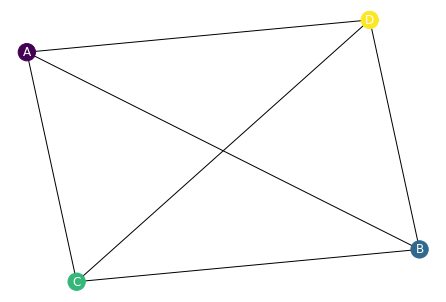

Complete Graph for Subject of Sem  2 :
['A', 'B', 'E', 'F', 'G', 'H']


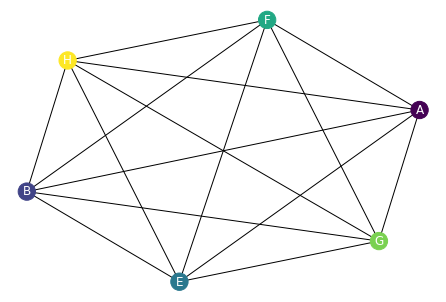

Complete Graph for Subject of Sem  3 :
['A', 'B', 'H', 'I', 'J', 'K', 'L']


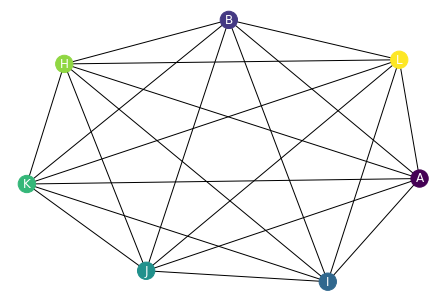

In [3]:
reverse = dict(zip(subjects.values(),subjects.keys()))
color_subjects={}
CompleteGraph = nx.Graph()
k=1
x=1

for i in range(0,s):
    
    sub=[]
    G = nx.Graph()
    for j in range(0,len(subjects)):
        if matrix[i][j]==1:
            sub.append(reverse[j])

    chromatic=[0,1,2,3,4,5,6]
    for y in range(0,i):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]])    
    index=0
    for subject in range(0,len(sub)):
        if sub[subject] not in color_subjects.keys():

                color_subjects.update({sub[subject]:chromatic[index]})
                index=index+1

    print("Complete Graph for Subject of Sem ",(x)%4,":")
    print(sub)
    
    x+=1
    G.add_nodes_from(sub)
    G.add_edges_from(itertools.combinations(sub, 2))
    values = [color_subjects.get(node,0.25) for node in G.nodes()]
    CompleteGraph.add_nodes_from(sub)
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2), weight =10)
    nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
    plt.show()

Complete Graph for Subject of Sem  1 :
['A', 'B', 'M', 'N']
[0, 1, 4, 5]


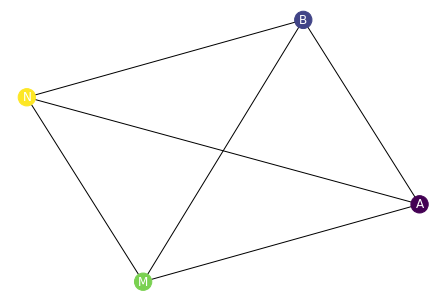

Complete Graph for Subject of Sem  2 :
['A', 'B', 'E', 'F', 'M', 'O', 'P']
[0, 1, 2, 3, 4, 5, 6]


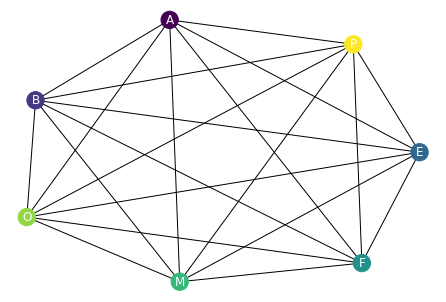

Complete Graph for Subject of Sem  3 :
['B', 'I', 'J', 'O', 'P', 'Q', 'R']
[1, 2, 3, 5, 6, 0, 4]


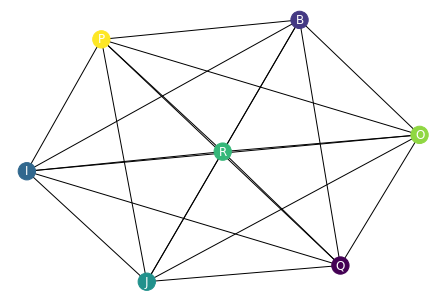

In [4]:
x=1
for i in range(s,n*s):
    
    sub=[]
    G = nx.Graph()
    for j in range(0,len(subjects)):
        if matrix[i][j]==1:
            sub.append(reverse[j]) 

    chromatic=[0,1,2,3,4,5,6]
    for y in range(0,i):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in sub and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]])

    for y in range(i+1,s*n):
        for z in range(0,len(subjects)):
            if matrix[y][z] == 1 and reverse[z] in color_subjects.keys() and color_subjects[reverse[z]] in chromatic:
                chromatic.remove(color_subjects[reverse[z]]) 

    index=0
    for subject in range(0,len(sub)):
        if sub[subject] not in color_subjects.keys():
            color_subjects.update({sub[subject]:chromatic[index]})
            index=index+1
    print("Complete Graph for Subject of Sem ",(x)%4,":")
    print(sub)
    
    x+=1
    G.add_nodes_from(sub)
    G.add_edges_from(itertools.combinations(sub, 2))
    CompleteGraph.add_nodes_from(sub)
    CompleteGraph.add_edges_from(itertools.combinations(sub, 2),weight=10)
    values = [color_subjects.get(node,0.25) for node in G.nodes()]
    print(values)
    nx.draw(G, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
    plt.show()

Graph for All Subjects


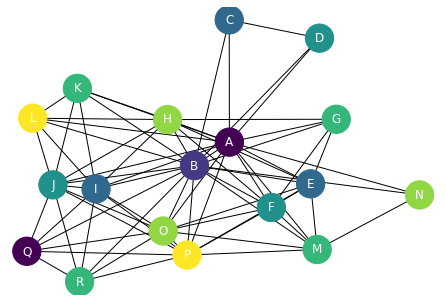

In [5]:
print("Graph for All Subjects")
values = [color_subjects.get(node,0.25) for node in CompleteGraph.nodes()]
nx.draw(CompleteGraph, node_size=800, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True, font_color='white')
nx.draw
plt.show()

In [6]:
data=np.chararray((6,9),unicode=True)
for i in range(0,n*s):
    for j in range(0,len(subjects)):
        if matrix[i][j] == 1:
            data[i][2+color_subjects[reverse[j]]]=str(reverse[j])
final = pd.DataFrame(data, columns = ['Course','Sem', 'Slot1','Slot2','Slot3','Slot4','Slot5','Slot6','Slot7'])
for i in range(0,n*s):
    if i < s:
        final.at[i,'Course']=(df['Course'].unique()[0])
    else:
        final.at[i,'Course']=(df['Course'].unique()[1])
    final.at[i,'Sem']=(df['Sem'].unique()[(i)%s])

print("\nFinal Schedule For Each Semester:")
final


Final Schedule For Each Semester:


,Course,Sem,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6,Slot7
0,MCA,1,A,B,C,D,,,
1,MCA,2,A,B,E,F,G,H,
2,MCA,3,A,B,I,J,K,H,L
3,Mtech,1,A,B,,,M,N,
4,Mtech,2,A,B,E,F,M,O,P
5,Mtech,3,Q,B,I,J,R,O,P
